In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.integrate as integrate 

def integrate_function(t, func, f, tau, real_part=True):
   
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t) 
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im


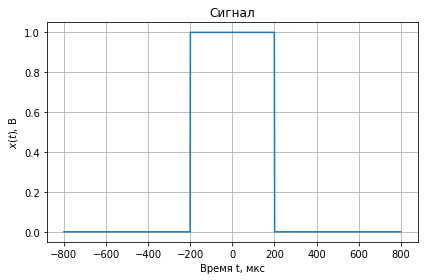

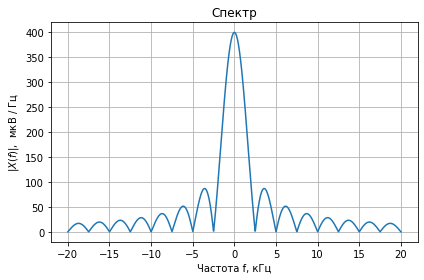

In [ ]:
tau=400e-6

f_band=np.linspace(-8/tau, 8/tau, 2000)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0                  
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

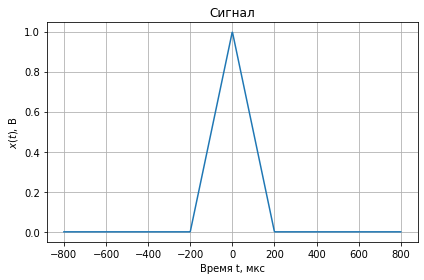

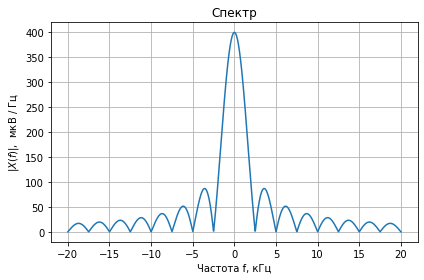

In [ ]:
def triangle(t, tau):
    if abs(t)<tau/2:
        return 1.0 - (2*abs(t))/tau               
    else:
        return 0.0 
        
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [triangle(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

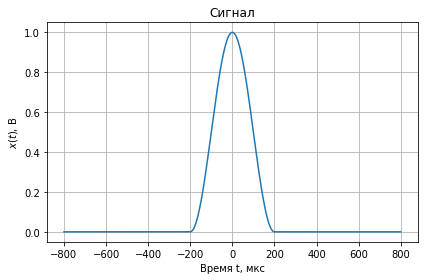

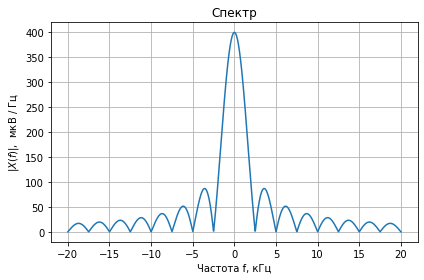

In [ ]:
def hann(t, tau):
    if abs(t)<tau/2:
      f = (1.0/2.0)*(1.0+np.cos(2*np.pi*t/tau))
      return f               
    else:
        return 0.0 
        
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [hann(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

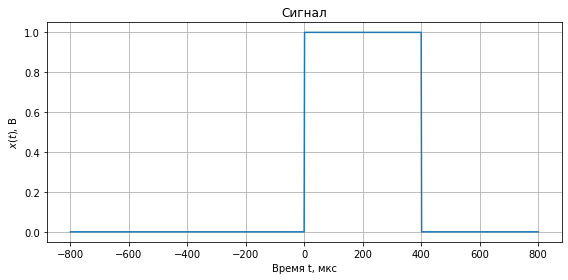

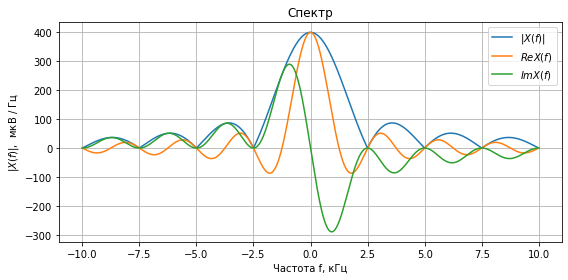

In [ ]:
tau=400*1e-6

f_band=np.linspace(-4/tau, 4/tau, 1000)
def boxcar(t, tau):
    if 0<t<tau:
        return 1
    else:
        return 0.0
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

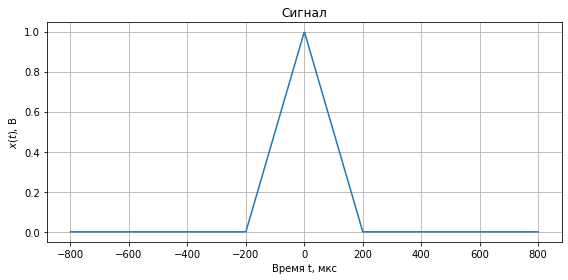

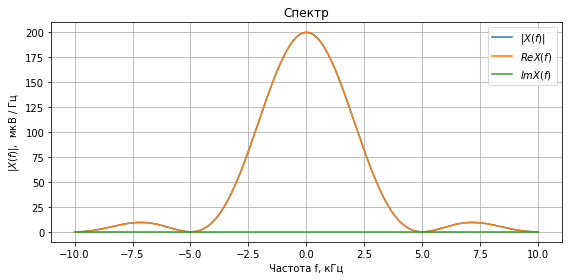

In [ ]:
f_band=np.linspace(-4/tau, 4/tau, 1000)
def triangle(t, tau):
    if abs(t)<tau/2:
        return 1.0 - (2*abs(t))/tau               
    else:
        return 0.0 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [triangle(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=triangle, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=triangle, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=triangle, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

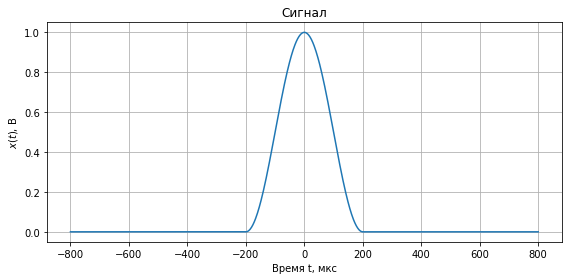

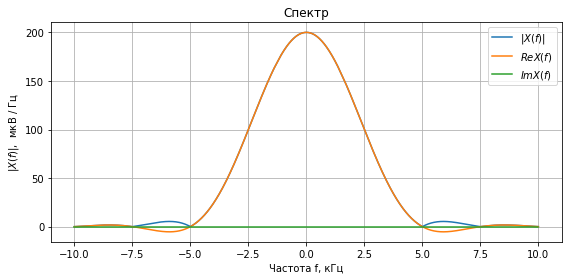

In [ ]:
f_band=np.linspace(-4/tau, 4/tau, 1000)
def hann(t, tau):
    if abs(t)<tau/2:
      f = (1.0/2.0)*(1.0+np.cos(2*np.pi*t/tau))
      return f               
    else:
        return 0.0  
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [hann(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=hann, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=hann, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=hann, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

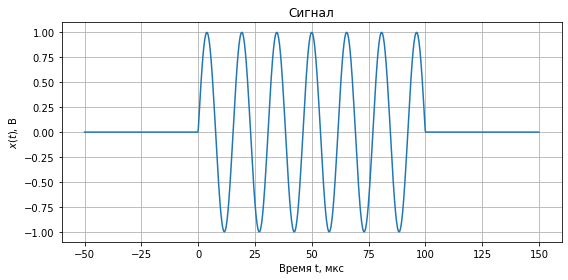

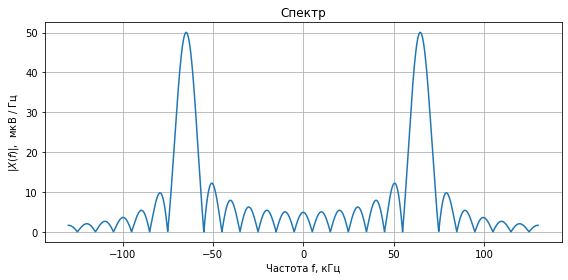

In [ ]:
f0=65*1e3      
tau=100*1e-6   

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:   
        return np.sin(2*np.pi*f0*t)       
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 5000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

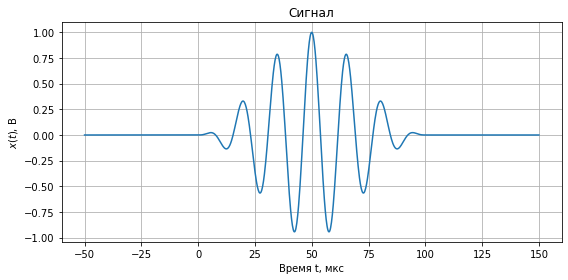

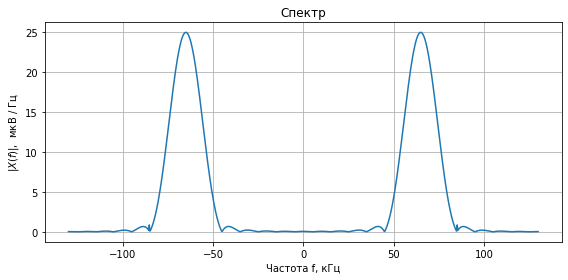

In [ ]:
f0=65*1e3      
tau=100*1e-6   

def sin_with_hann(t, tau):                            
    if 0<=t<=tau:
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 1000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_hann(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_hann, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  from ipykernel import kernelapp as app


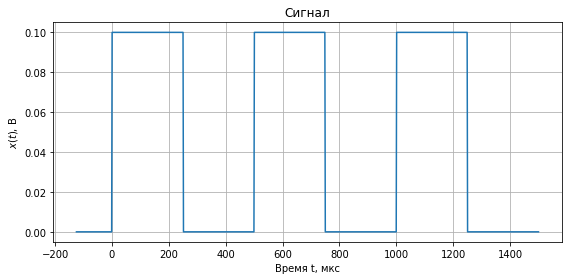

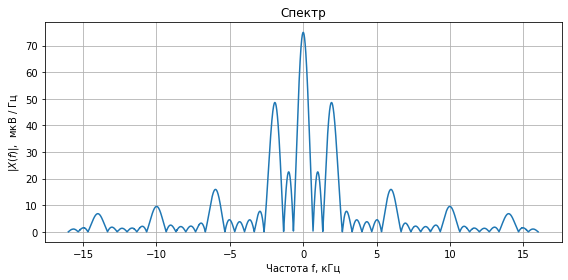

In [ ]:
N=3
tau=250e-6
period = 500e-6 

f_band=np.linspace(-4/tau, 4/tau, 5000)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


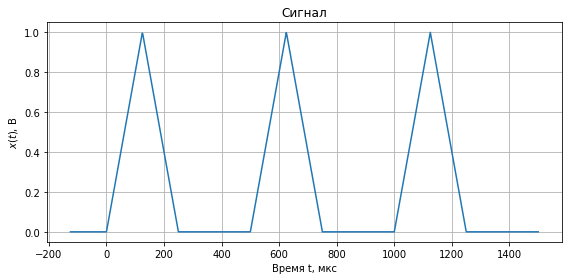

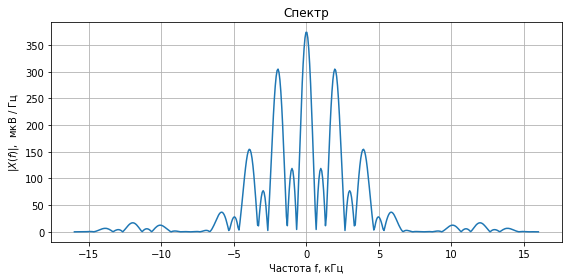

In [ ]:
N=3
tau=250e-6
period = 500e-6 

f_band=np.linspace(-4/tau, 4/tau, 500)

def triangle(t, tau):
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        tau2 = (tau0+tau1)/2
        if tau0 < t < tau1:
          return abs(1-(2*abs((t-tau2))/(tau)))
             
    return 0.0 

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [triangle(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=triangle, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

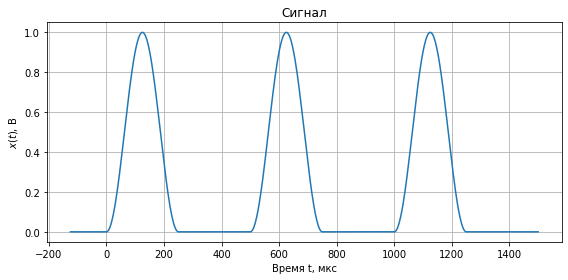

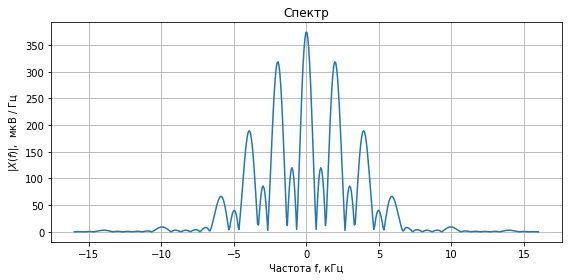

In [ ]:
N=3
tau=250e-6
period = 500e-6 

f_band=np.linspace(-4/tau, 4/tau, 500)

def hann(t, tau):
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        tau2 = (tau0+tau1)/2
        if tau0 < t < tau1:
          f = (1.0/2.0)*(1.0+np.cos(2*np.pi*(t-tau2)/tau))
          return f
             
    return 0.0 

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [hann(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=hann, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()